In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [12]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/spotify.csv')
dataset.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [13]:
X = dataset.iloc[:, 13:15]
X.head()

,key,loudness
0,6,-2.634
1,11,-4.969
2,1,-3.432
3,7,-3.778
4,1,-4.672


In [14]:
X.shape

(32833, 2)

In [15]:
X.isnull().sum()

key         0
loudness    0
dtype: int64

In [16]:
X.describe()

,key,loudness
count,32833.000000,32833.000000
mean,5.374471,-6.719499
std,3.611657,2.988436
min,0.000000,-46.448000
25%,2.000000,-8.171000
50%,6.000000,-6.166000
75%,9.000000,-4.645000
max,11.000000,1.275000


In [17]:
wcss = []
for i in range(1, 23):
  kmeans = KMeans(n_clusters = i, random_state = 14)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

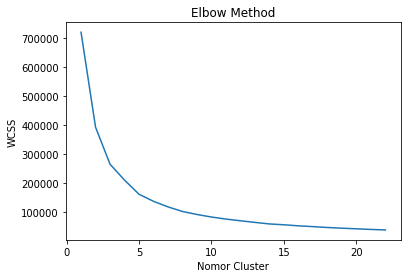

In [18]:
plt.plot(range(1, 23), wcss)
plt.title("Elbow Method")
plt.xlabel("Nomor Cluster")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 5, random_state = 14)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=14)

In [20]:
kmeans.labels_

array([4, 1, 2, ..., 4, 2, 4], dtype=int32)

In [21]:
hasil_kmeans = X.copy()
hasil_kmeans["cluster"] = kmeans.labels_
hasil_kmeans.head()

,key,loudness,cluster
0,6,-2.634,4
1,11,-4.969,1
2,1,-3.432,2
3,7,-3.778,4
4,1,-4.672,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WCSS')

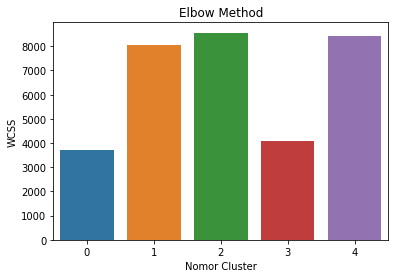

In [22]:
cluster_x = hasil_kmeans["cluster"].value_counts().index
cluster_y = hasil_kmeans["cluster"].value_counts().values

sns.barplot(cluster_x, cluster_y)
plt.title("Elbow Method")
plt.xlabel("Nomor Cluster")
plt.ylabel("WCSS")

In [23]:
key0 = hasil_kmeans[hasil_kmeans["cluster"] ==0 ].iloc[:, 0]
loud_kmeans0 = hasil_kmeans[hasil_kmeans["cluster"]==0 ].iloc[:, 1]

key1 = hasil_kmeans[hasil_kmeans["cluster"] ==1 ].iloc[:, 0]
loud_kmeans1 = hasil_kmeans[hasil_kmeans["cluster"]==1 ].iloc[:, 1]

key2 = hasil_kmeans[hasil_kmeans["cluster"] ==2 ].iloc[:, 0]
loud_kmeans2 = hasil_kmeans[hasil_kmeans["cluster"]==2 ].iloc[:, 1]

key3 = hasil_kmeans[hasil_kmeans["cluster"] ==3 ].iloc[:, 0]
loud_kmeans3 = hasil_kmeans[hasil_kmeans["cluster"]==3 ].iloc[:, 1] 

key4 = hasil_kmeans[hasil_kmeans["cluster"] ==4 ].iloc[:, 0]
loud_kmeans4 = hasil_kmeans[hasil_kmeans["cluster"]==4 ].iloc[:, 1]

In [24]:
centroid_cluster = kmeans.cluster_centers_
centroid_cluster

array([[  2.10069444, -11.0143141 ],
       [  9.5717831 ,  -5.38961323],
       [  1.09778922,  -5.38461539],
       [  8.48930416, -10.82462306],
       [  5.65070121,  -5.45424424]])

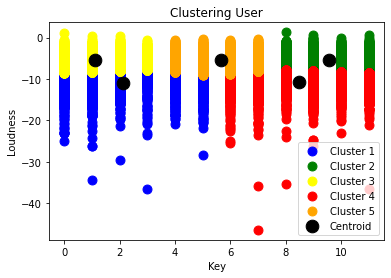

In [25]:
#Visualisasi Hasil Clustering
plt.scatter(key0, loud_kmeans0, s = 80, c = "blue", label = "Cluster 1")
plt.scatter(key1, loud_kmeans1, s = 80, c = "green", label = "Cluster 2")
plt.scatter(key2, loud_kmeans2, s = 80, c = "yellow", label = "Cluster 3")
plt.scatter(key3, loud_kmeans3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(key4, loud_kmeans4, s = 80, c = "orange", label = "Cluster 5")

#Centroid
plt.scatter(centroid_cluster[:, 0], centroid_cluster[:, 1], s = 160, c = "black", label = "Centroid")
plt.title("Clustering User")
plt.xlabel("Key")
plt.ylabel("Loudness")
plt.legend()
plt.show()